## Chapter 19: Data Analysis

This chapter covers the introduction to some data analysis.  We will load data from existing datasets (that are from a package), do some plotting and some analysis of the dataset. 

Let's load the following packages.

In [70]:
using RDatasets, StatsPlots,  StatsBase, Statistics, DataFrames

The RDatasets package is a bunch of datasets that are built-in to the R language, a statistics language that is quite popular.  The following shows all of the data packages:

In [71]:
RDatasets.packages()

Row,Package,Title
,String15,String
1,COUNT,"Functions, data and code for count data."
2,Ecdat,Data sets for econometrics
3,HSAUR,A Handbook of Statistical Analyses Using R (1st Edition)
4,HistData,Data sets from the history of statistics and data visualization
5,ISLR,Data for An Introduction to Statistical Learning with Applications in R
6,KMsurv,"Data sets from Klein and Moeschberger (1997), Survival Analysis"
7,MASS,Support Functions and Datasets for Venables and Ripley's MASS
8,SASmixed,"Data sets from ""SAS System for Mixed Models"""
9,Zelig,Everyone's Statistical Software


Each package as a set of datasets within it.  Here's the datasets in the `datasets` package. 

In [72]:
RDatasets.datasets("datasets")

Row,Package,Dataset,Title,Rows,Columns
,String15,String31,String,Int64,Int64
1,datasets,BOD,Biochemical Oxygen Demand,6,2
2,datasets,CO2,Carbon Dioxide Uptake in Grass Plants,84,5
3,datasets,Formaldehyde,Determination of Formaldehyde,6,2
4,datasets,HairEyeColor,Hair and Eye Color of Statistics Students,32,4
5,datasets,InsectSprays,Effectiveness of Insect Sprays,72,2
6,datasets,LifeCycleSavings,Intercountry Life-Cycle Savings Data,50,6
7,datasets,Loblolly,Growth of Loblolly pine trees,84,4
8,datasets,OrchardSprays,Potency of Orchard Sprays,64,4
9,datasets,PlantGrowth,Results from an Experiment on Plant Growth,30,2


This loads the `iris` dataset from the `datasets` package.  The result is a `DataFrame` and we will see details about this later.  Each column in a `DataFrame` has a particular type, but this is better for general datasets than an array.  The column headers give the name of the column as well as the datatype of the column: 

In [74]:
iris=RDatasets.dataset("datasets","iris")

Row,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


#### 19.2: Accessing the DataFrame

We can get a column by using brackets and the name of the column (preceded with a colon).  The result is a 1-D array of the type give by the column type. 

In [75]:
iris[!,:SepalWidth]

150-element Vector{Float64}:
 3.5
 3.0
 3.2
 3.1
 3.6
 3.9
 3.4
 3.4
 2.9
 3.1
 3.7
 3.4
 3.0
 ⋮
 3.0
 3.1
 3.1
 3.1
 2.7
 3.2
 3.3
 3.0
 2.5
 3.0
 3.4
 3.0

We can also select the column by number.

In [76]:
iris[!,2]

150-element Vector{Float64}:
 3.5
 3.0
 3.2
 3.1
 3.6
 3.9
 3.4
 3.4
 2.9
 3.1
 3.7
 3.4
 3.0
 ⋮
 3.0
 3.1
 3.1
 3.1
 2.7
 3.2
 3.3
 3.0
 2.5
 3.0
 3.4
 3.0

So for example, we can find the mean of this column using the built-in `mean` function:

In [77]:
mean(iris[!,:SepalWidth])

3.0573333333333337

And the following will find the standard deviation:

In [78]:
std(iris[!,:SepalWidth])

0.43586628493669827

If you only want part of a column, we can use a range to access the desired rows.

In [79]:
iris[11:20,:SepalWidth]

10-element Vector{Float64}:
 3.7
 3.4
 3.0
 3.0
 4.0
 4.4
 3.9
 3.5
 3.8
 3.8

In [80]:
iris[1:2:end,:PetalWidth]

75-element Vector{Float64}:
 0.2
 0.2
 0.2
 0.3
 0.2
 0.2
 0.1
 0.2
 0.4
 0.3
 0.2
 0.2
 0.2
 ⋮
 1.8
 2.1
 1.9
 2.2
 1.4
 2.4
 1.8
 2.4
 1.9
 2.5
 1.9
 2.3

#### common functions of DataFrames

This is the size of the DataFrame.  this is similar to the `size` function for an array.  This shows that there are 150 rows and 5 columns. 

In [81]:
size(iris)

(150, 5)

Here are the column names:

In [82]:
names(iris)

5-element Vector{String}:
 "SepalLength"
 "SepalWidth"
 "PetalLength"
 "PetalWidth"
 "Species"

Here are the column types.  Note that the last one is a Categorical Value (since there are only 3 different values).  This runs the built-in function `eltype` over each of the columns.  The `.` is broadcasting over the columns.

In [83]:
eltype.(eachcol(iris))

5-element Vector{DataType}:
 Float64
 Float64
 Float64
 Float64
 CategoricalArrays.CategoricalValue{String, UInt8}

The first few rows of a DataFrame

In [84]:
first(iris,5)

Row,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


And the last 5 rows:

In [85]:
last(iris,5)

Row,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,6.7,3.0,5.2,2.3,virginica
2,6.3,2.5,5.0,1.9,virginica
3,6.5,3.0,5.2,2.0,virginica
4,6.2,3.4,5.4,2.3,virginica
5,5.9,3.0,5.1,1.8,virginica


### Basic Statistics

The `describe` function gives basic information about numerical variables with include mean, min, median, max and the number of missing values as well as the type.  Note: we will see missing values later in the chapter.

In [86]:
describe(iris)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,SepalLength,5.84333,4.3,5.8,7.9,0,Float64
2,SepalWidth,3.05733,2.0,3.0,4.4,0,Float64
3,PetalLength,3.758,1.0,4.35,6.9,0,Float64
4,PetalWidth,1.19933,0.1,1.3,2.5,0,Float64
5,Species,,setosa,,virginica,0,"CategoricalValue{String, UInt8}"


In [87]:
 mean(iris[!,:SepalLength]),std(iris[!,:SepalLength])

(5.843333333333334, 0.828066127977863)

#### 19.3: Creating a Dataframe

Although typically data (as a `DataFrame`) is loaded from a file or from the `RDatasets` package, we can make a data frame in the following way. 

Note: that the data is in columns and each is a vector or converted to a vector.

In [88]:
data = DataFrame(A = 1:2:13, B = ["M", "F", "F", "M","X","F","M"], C=[3.0,2.5,pi,-2.3,1/3,56,100],D=[(-1)^n//n for n=1:7])

Row,A,B,C,D
,Int64,String,Float64,Rational…
1,1,M,3.0,-1//1
2,3,F,2.5,1//2
3,5,F,3.14159,-1//3
4,7,M,-2.3,1//4
5,9,X,0.333333,-1//5
6,11,F,56.0,1//6
7,13,M,100.0,-1//7


In [89]:
size(data)

(7, 4)

In [90]:
names(data)

4-element Vector{String}:
 "A"
 "B"
 "C"
 "D"

In [91]:
describe(data)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,A,7.0,1,7.0,13,0,Int64
2,B,,F,,X,0,String
3,C,23.2393,-2.3,3.0,100.0,0,Float64
4,D,-319//2940,-1//1,-0.142857,1//2,0,Rational{Int64}


#### 19.2.4: Plotting data in a DataFrame

We can plot the data in a DataFrame in a manner similar to that in the `Plots` package, such as:

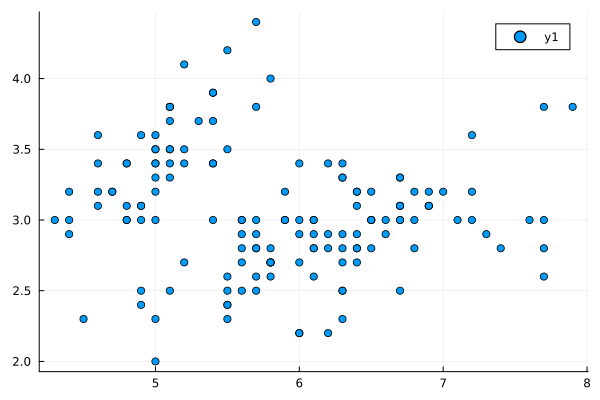

In [92]:
scatter(iris[!,:SepalLength],iris[!,:SepalWidth])

However, the `StatsPlots` package has some nice shorthand for this.  The `@df` macro is used to plot a DataFrame where the first object is the DataFrame and then the plot command.  Note that this macro allows to just add the columns.

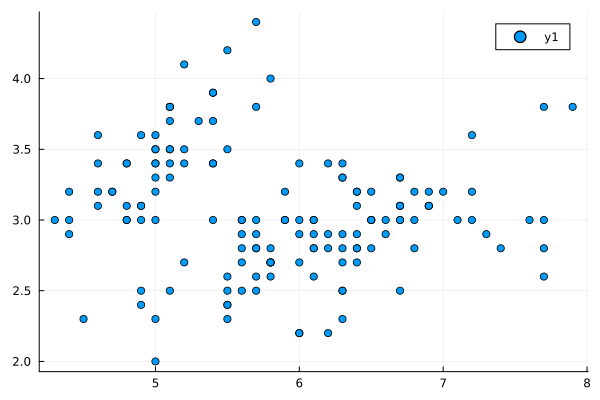

In [93]:
@df iris scatter(:SepalLength,:SepalWidth)

Here's a nice plot by coloring depending on Species, the categorical variable.

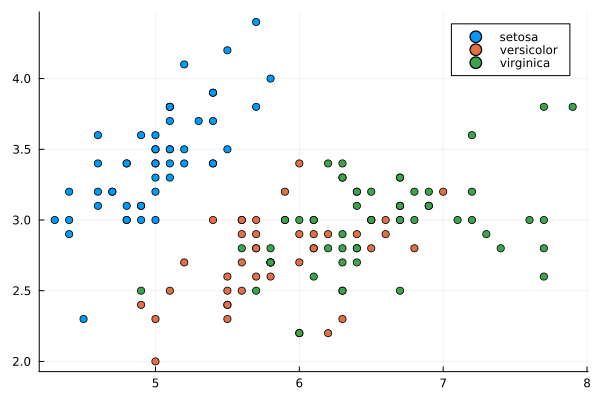

In [94]:
@df iris scatter(:SepalLength,:SepalWidth,group=:Species)

In [95]:
mean(iris[!,:SepalWidth]),std(iris[!,:SepalWidth])

(3.0573333333333337, 0.43586628493669827)

### 19.3: Manipulating DataFrames

Typically once you have a data frame, you will need to manipulate it.  This includes filtering (subsets) rows or columns and creating new columns.  We will cover that in this section. 

#### Selecting columns
First, if we want to select specific columns, we can do this in a couple of different ways.  First, using the same technique as above.  This selects the A and D column.  Note the colon (:) in front of the column names.  

In [96]:
data[!,[:A,:D]]

Row,A,D
,Int64,Rational…
1,1,-1//1
2,3,1//2
3,5,-1//3
4,7,1//4
5,9,-1//5
6,11,1//6
7,13,-1//7


Alternatively, we can use the `select` function.  The first argument is the data frame and the others are columns names.

In [97]:
select(data, :A, :D)

Row,A,D
,Int64,Rational…
1,1,-1//1
2,3,1//2
3,5,-1//3
4,7,1//4
5,9,-1//5
6,11,1//6
7,13,-1//7


And we can use column numbers and reorder:

In [98]:
select(data, 4,3)

Row,D,C
,Rational…,Float64
1,-1//1,3.0
2,1//2,2.5
3,-1//3,3.14159
4,1//4,-2.3
5,-1//5,0.333333
6,1//6,56.0
7,-1//7,100.0


In [100]:
data

Row,A,B,C,D
,Int64,String,Float64,Rational…
1,1,M,3.0,-1//1
2,3,F,2.5,1//2
3,5,F,3.14159,-1//3
4,7,M,-2.3,1//4
5,9,X,0.333333,-1//5
6,11,F,56.0,1//6
7,13,M,100.0,-1//7


#### Filtering (or subsetting) the rows

Next, we see how to filter (or subset) the rows based on some condition.  This example shows that we take only the rows where the column A values are less than 10.

In [103]:
subset(data, :A => a-> a .< 10)

Row,A,B,C,D
,Int64,String,Float64,Rational…
1,1,M,3.0,-1//1
2,3,F,2.5,1//2
3,5,F,3.14159,-1//3
4,7,M,-2.3,1//4
5,9,X,0.333333,-1//5


Note that the last argument is a function (anonymous) whose input is the entire column and we want a vector of booleans.  This is why the less than sign is broadcast (`.<`). This returns a vector of booleans (`BitVector`)

In [101]:
data[!,:A] .< 10

7-element BitVector:
 1
 1
 1
 1
 1
 0
 0

Alternatively, we can use the `ByRow` function on a non-vector function like:

In [104]:
subset(data, :A => ByRow(a-> a < 10))

Row,A,B,C,D
,Int64,String,Float64,Rational…
1,1,M,3.0,-1//1
2,3,F,2.5,1//2
3,5,F,3.14159,-1//3
4,7,M,-2.3,1//4
5,9,X,0.333333,-1//5


This filters all rows where column B is "F":

In [105]:
subset(data, :B => b-> b.== "F")

Row,A,B,C,D
,Int64,String,Float64,Rational…
1,3,F,2.5,1//2
2,5,F,3.14159,-1//3
3,11,F,56.0,1//6


In [107]:
data

Row,A,B,C,D
,Int64,String,Float64,Rational…
1,1,M,3.0,-1//1
2,3,F,2.5,1//2
3,5,F,3.14159,-1//3
4,7,M,-2.3,1//4
5,9,X,0.333333,-1//5
6,11,F,56.0,1//6
7,13,M,100.0,-1//7


We can filter on more than one column.  This example returns all rows where column A is larger than column C.

Note: that the columns must be put into vector format and then the function must have 2 columns. 

In [106]:
subset(data, [:A, :C] => (a,c) -> a .> c)

Row,A,B,C,D
,Int64,String,Float64,Rational…
1,3,F,2.5,1//2
2,5,F,3.14159,-1//3
3,7,M,-2.3,1//4
4,9,X,0.333333,-1//5


And here's an example using three columns

In [108]:
subset(data, [:A, :D, :C] => (a,d,c) -> a.*d .> c)

Row,A,B,C,D
,Int64,String,Float64,Rational…
1,7,M,-2.3,1//4


#### Exercise

- find all rows where the absolute value of the C column is greater than 2.
- find all rows where the product of columns C and D is greater than 1.

In [112]:
subset(data, :C => c-> abs.(c) .> 2)

Row,A,B,C,D
,Int64,String,Float64,Rational…
1,1,M,3.0,-1//1
2,3,F,2.5,1//2
3,5,F,3.14159,-1//3
4,7,M,-2.3,1//4
5,11,F,56.0,1//6
6,13,M,100.0,-1//7


In [113]:
abs.(data[!,:C])

7-element Vector{Float64}:
   3.0
   2.5
   3.141592653589793
   2.3
   0.3333333333333333
  56.0
 100.0

In [114]:
subset(data, [:C, :D] => (c,d) -> c.*d .> 1)

Row,A,B,C,D
,Int64,String,Float64,Rational…
1,3,F,2.5,1//2
2,11,F,56.0,1//6


#### Transforming Data Frames

If you want a new column that is some function of one or more of the columns, we will use either `select` or `transform`:
- use `select` if you only want the new column(s) in the data frame
- use `transform` if you want the original data frame as well as the new columns

The following makes a dataframe with a single column that is the square of the A column

In [115]:
select(data, :A => a-> a.^2)

Row,A_function
,Int64
1,1
2,9
3,25
4,49
5,81
6,121
7,169


Notice that the new column has the generic column `A_function`. Instead, if we want to give that column a better name use: 

In [118]:
select(data, :A => (a-> a.^2) => :Asq)

Row,Asq
,Int64
1,1
2,9
3,25
4,49
5,81
6,121
7,169


Note: make sure the ( ) are around the function.  Remove them to see what happens.

In [120]:
data

Row,A,B,C,D
,Int64,String,Float64,Rational…
1,1,M,3.0,-1//1
2,3,F,2.5,1//2
3,5,F,3.14159,-1//3
4,7,M,-2.3,1//4
5,9,X,0.333333,-1//5
6,11,F,56.0,1//6
7,13,M,100.0,-1//7


We can also make a column based on a function of two columns. For example:

In [119]:
select(data, [:C, :D] => ((c,d)-> c.*d) => :prod)

Row,prod
,Float64
1,-3.0
2,1.25
3,-1.0472
4,-0.575
5,-0.0666667
6,9.33333
7,-14.2857


And if we want to do both:

In [121]:
select(data, :A => (a-> a.^2) => :Asq, [:C, :D] => ((c,d)-> c.*d) => :prod)

Row,Asq,prod
,Int64,Float64
1,1,-3.0
2,9,1.25
3,25,-1.0472
4,49,-0.575
5,81,-0.0666667
6,121,9.33333
7,169,-14.2857


If instead of ignoring the original dataframe, we can add additional columns to it with the `transform` function

In [122]:
transform(data, :A => (a-> a.^2) => :Asq)

Row,A,B,C,D,Asq
,Int64,String,Float64,Rational…,Int64
1,1,M,3.0,-1//1,1
2,3,F,2.5,1//2,9
3,5,F,3.14159,-1//3,25
4,7,M,-2.3,1//4,49
5,9,X,0.333333,-1//5,81
6,11,F,56.0,1//6,121
7,13,M,100.0,-1//7,169


#### Exercise

- create a new data frame from `data` which is the square root of column C.
- Using the `iris` dataframe produce a new column called `area` which is the area of a petal using the `PetalLength` and `PetalWidth` variables and the area of an ellipse. Keep the original columns with this new dataframe.

In [125]:
transform(iris, [:PetalLength, :PetalWidth] => ((l,w)-> pi/4*l.*w   ) => :area)

Row,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,area
,Float64,Float64,Float64,Float64,Cat…,Float64
1,5.1,3.5,1.4,0.2,setosa,0.219911
2,4.9,3.0,1.4,0.2,setosa,0.219911
3,4.7,3.2,1.3,0.2,setosa,0.204204
4,4.6,3.1,1.5,0.2,setosa,0.235619
5,5.0,3.6,1.4,0.2,setosa,0.219911
6,5.4,3.9,1.7,0.4,setosa,0.534071
7,4.6,3.4,1.4,0.3,setosa,0.329867
8,5.0,3.4,1.5,0.2,setosa,0.235619
9,4.4,2.9,1.4,0.2,setosa,0.219911


#### Sorting DataFrames

Sorting data frames is quite helpful in many situations.  We use the `sort` function to do this.  The following sorts on column C

In [126]:
sort(data, :C)

Row,A,B,C,D
,Int64,String,Float64,Rational…
1,7,M,-2.3,1//4
2,9,X,0.333333,-1//5
3,3,F,2.5,1//2
4,1,M,3.0,-1//1
5,5,F,3.14159,-1//3
6,11,F,56.0,1//6
7,13,M,100.0,-1//7


And if we want to sort in reverse order

In [127]:
sort(data, :C, rev = true)

Row,A,B,C,D
,Int64,String,Float64,Rational…
1,13,M,100.0,-1//7
2,11,F,56.0,1//6
3,5,F,3.14159,-1//3
4,1,M,3.0,-1//1
5,3,F,2.5,1//2
6,9,X,0.333333,-1//5
7,7,M,-2.3,1//4


In [131]:
data

Row,A,B,C,D
,Int64,String,Float64,Rational…
1,1,M,3.0,-1//1
2,3,F,2.5,1//2
3,5,F,3.14159,-1//3
4,7,M,-2.3,1//4
5,9,X,0.333333,-1//5
6,11,F,56.0,1//6
7,13,M,100.0,-1//7


And sorting is done by type.  This sorts lexiographically.

In [128]:
sort(data, :B)

Row,A,B,C,D
,Int64,String,Float64,Rational…
1,3,F,2.5,1//2
2,5,F,3.14159,-1//3
3,11,F,56.0,1//6
4,1,M,3.0,-1//1
5,7,M,-2.3,1//4
6,13,M,100.0,-1//7
7,9,X,0.333333,-1//5


In [130]:
sort(data, [:B, :C])

Row,A,B,C,D
,Int64,String,Float64,Rational…
1,3,F,2.5,1//2
2,5,F,3.14159,-1//3
3,11,F,56.0,1//6
4,7,M,-2.3,1//4
5,1,M,3.0,-1//1
6,13,M,100.0,-1//7
7,9,X,0.333333,-1//5


## 19.5: Joining DataFrames

Another important activity to do with data frames is joining two or more.  Typically this means that both data frame have a common piece of information on which to join.  Consider the following:

In [134]:
simpsons = DataFrame(
    id=[5,3,13,1,7,9,11],
    name=["Homer","Marge","Lisa","Bart","Maggie","Apu","Moe"],
    age =[45,42,8,10,1,38,59],
    salary = [50000,25000,10000,missing,missing,45000,3000],
    favorite_food = ["pork chops","casserole","salad","hamburger",missing,"saag paneer","peanuts"]
  )

Row,id,name,age,salary,favorite_food
,Int64,String,Int64,Int64?,String?
1,5,Homer,45,50000,pork chops
2,3,Marge,42,25000,casserole
3,13,Lisa,8,10000,salad
4,1,Bart,10,missing,hamburger
5,7,Maggie,1,missing,missing
6,9,Apu,38,45000,saag paneer
7,11,Moe,59,3000,peanuts


A keen eye notices that the `salary` and `favorite_food` columns data types have a ?.  This is because they have missing data.  Again, we'll explain how to handle this later. 

If we want to join this to the data frame called `data` where column `id` above matches `A` on `data`, we do the following:

In [135]:
innerjoin(data, simpsons, on = :A => :id)

Row,A,B,C,D,name,age,salary,favorite_food
,Int64,String,Float64,Rational…,String,Int64,Int64?,String?
1,5,F,3.14159,-1//3,Homer,45,50000,pork chops
2,3,F,2.5,1//2,Marge,42,25000,casserole
3,13,M,100.0,-1//7,Lisa,8,10000,salad
4,1,M,3.0,-1//1,Bart,10,missing,hamburger
5,7,M,-2.3,1//4,Maggie,1,missing,missing
6,9,X,0.333333,-1//5,Apu,38,45000,saag paneer
7,11,F,56.0,1//6,Moe,59,3000,peanuts


We will explain the `innerjoin` below, but a couple of things.  First, the first 4 columns came from `data` and the last 4 from `simpsons` (these don't need to be equal).  The `id` column from `simpsons` was dropped. 

The following are the joins in the `DataFrames` package:

- **innerjoin:** the output contains rows for values of the key that exist in all passed data frames.
- **leftjoin:** the output contains rows for values of the key that exist in the first (left) argument, whether or not that value exists in the second (right) argument.
- **rightjoin:** the output contains rows for values of the key that exist in the second (right) argument, whether or not that value exists in the first (left) argument.
- **outerjoin:** the output contains rows for values of the key that exist in any of the passed data frames.
- **semijoin:** Like an inner join, but output is restricted to columns from the first (left) argument.
- **antijoin:** The output contains rows for values of the key that exist in the first (left) but not the second (right) argument. As with semijoin, output is restricted to columns from the first (left) argument.
- **crossjoin:** The output is the cartesian product of rows from all passed data frames.

## 19.6: Summarizing Data

Usually one wants to boil down a dataset to a few numbers. This is typically what the mean, median, standard deviation and quartiles are useful for.  

The `combine` function in `DataFrames` will do this:

In [136]:
data

Row,A,B,C,D
,Int64,String,Float64,Rational…
1,1,M,3.0,-1//1
2,3,F,2.5,1//2
3,5,F,3.14159,-1//3
4,7,M,-2.3,1//4
5,9,X,0.333333,-1//5
6,11,F,56.0,1//6
7,13,M,100.0,-1//7


In [137]:
combine(data, :A => mean, :C => mean, :C => std, :D => (d -> quantile(d,0.75)) )

Row,A_mean,C_mean,C_std,D_function
,Float64,Float64,Float64,Float64
1,7.0,23.2393,39.5518,0.208333


where the last function returns the 3rd quartile (0.75 quantile). 

We will see `combine` below in which a dataset is grouped and then computations are made on a per group basis.

## 19.7: The Pipe function

Consider the following crazy, made up nested function evaluation
$$ \ln(\sqrt{e^{\sin(\tan^{-1}(0.25)}})$$
In julia we can evaluate this with

In [140]:
log(sqrt(exp(sin(atan(0.25)))))

0.1212678125181664

And if you are not careful, the parentheses can be difficult to balance right. However, another way to think of this is to start with the number 0.25, apply the arctangent, apply the sine, apply the exponent, apply the square root, then apply the log. This can be done without parenetheses in the following way:

In [139]:
0.25 |> atan |> sin |> exp |> sqrt |> log

0.1212678125181664

resulting in the same value.  The `|>` is the pipe command which takes the value on the left and "sends" it to the function on the right. We can successively send (or pipe) to multiple functions as above and this is how it is powerful.

This works however only for functions of a single variable that has a name, but we can adapt this to other functions with an anonymous function.  Consider calculating $\sin(1+ e^{0.25})$ using pipes. We do this with

In [141]:
0.25 |> x-> 1+ exp(x) |> sin

0.7562530960821656

#### Another example

Let's look at an example with an array.  Calculate  ` deleteat!([1,2,3,4,5],3)` using pipes

In [142]:
1:5 |> collect |> arr -> deleteat!(arr,3)

4-element Vector{Int64}:
 1
 2
 4
 5

If you find this kinda overkill, you're right with these examples. We will do this with dataframes below, which is where it can get quite nice.

We will use the `Chain` package to help as well.  add this to the package manager and then

In [143]:
using Chain

The chain package has a macro called `@chain` which will make the steps even clearer.  The above steps can be written as

In [144]:
@chain 1:5 begin
  collect
  deleteat!(3)
end

4-element Vector{Int64}:
 1
 2
 4
 5

Between the `@chain` and the `begin` is what we are starting with.  In this case, the range `1:5`. Then each line inside the `@chain` does a separate step.  
1. call `collect`, that is make the vector.
2. delete the 3rd element. 

The way this works, is that `@chain` inserts the line above in the first argument of each line.  That is the first line is really `collect(1:5)` and then the second line is `deleteat!(collect(1:5),3)`.

Hopefully you can see that with 3 or more steps, this can simplify things. 

Here's another example. 
1. Start with the vector [1,2,3,4,5,6,7,8,9,10],
2. square each element 
3. keep all even numbers 
4. find the mean.

We will do this starting with `1:10` and then making a single function call on each line of the `@chain`.

In [148]:
@chain 1:10 begin
  collect
  _.^2
  filter(x->mod(x,2)==0,_)
  mean
end

44.0

Notice that on the 3rd and 4th lines that there is an underscore `_`. This tells `@chain` where to put the argument from the above line.

#### Exercise

We are going to find the standard deviation of the numbers $\pi/3, 4\pi/3, 7\pi,3, 10\pi/3, \ldots, 100\pi/3$ by the following.
1. start with the range from 1 to 100.
2. make a vector.
3. filter only values that only appear in 1,4,7,10, ...
4. multiply by $\pi/3$ 
5. find the standard deviation

In [153]:
@chain 1:100 begin
  collect
  filter(x->mod(x,3)==1,_)
  *(pi/3)
  std
end

31.28475299206779

### Using a data frame with Chain

The above examples are still a bit overkill, but let's repeat the above steps with a dataframe, which is typically how we will use Chain. 

In [158]:
df = DataFrame(x=1:10)
@chain df begin
  select(:x)
  select(:x => (x->x.^2) => :xsq)
  subset(:xsq => x-> mod.(x,2) .== 0)
  combine(:xsq => mean)
end

Row,xsq_mean
,Float64
1,44.0


### 19.8: Missing Data

Often in a DataFrame, data is missing and julia has a data type called `Missing` that has only one value, `missing`.  Before we examine missing and DataFrames, here's some examples with just the missing value:

In [159]:
typeof(missing)

Missing

In [160]:
missing+6

missing

In [161]:
mean([1,2,3,missing,5])

missing

In many ways, any operation of `missing` results in `missing` and in many ways, this is a way to signal that data is missing.

#### missing values in a DataFrame

Recall that the `simpsons` dataset above had missing data:

In [162]:
simpsons

Row,id,name,age,salary,favorite_food
,Int64,String,Int64,Int64?,String?
1,5,Homer,45,50000,pork chops
2,3,Marge,42,25000,casserole
3,13,Lisa,8,10000,salad
4,1,Bart,10,missing,hamburger
5,7,Maggie,1,missing,missing
6,9,Apu,38,45000,saag paneer
7,11,Moe,59,3000,peanuts


First, note that the datatypes on the salary and favorite_food columns have a ?.  Actually the data type of these is: 

In [163]:
eltype.(eachcol(simpsons))

5-element Vector{Type}:
 Int64
 String
 Int64
 Union{Missing, Int64}
 Union{Missing, String}

And you can see that the last two element types are `Union{Missing,Int64}` and `Union{Missing,String}`.  The Union datatype is a way to handle more than Type.  This means that the elements of salary can be either `String` or `Missing`.  

We can find the maximum age with:

In [164]:
maximum(simpsons[!,:age])

59

In [165]:
simpsons[!,:age] |> maximum

59

In [166]:
@chain simpsons begin
  combine(:age => maximum)
end

Row,age_maximum
,Int64
1,59


But if we do the same with the salary column:

In [167]:
maximum(simpsons[!,:salary])

missing

There is a nice function called `skipmissing` which is a bit strange in that:

In [168]:
skipmissing(simpsons[!,:salary])

skipmissing(Union{Missing, Int64}[50000, 25000, 10000, missing, missing, 45000, 3000])

And doesn't see to do anything except wrap the array in a `skipmissing` function, but if we now look for the maximum with:

In [169]:
maximum(skipmissing(simpsons[!,:salary]))

50000

In [170]:
simpsons[!,:salary] |> skipmissing |> maximum

50000

This returns what we expect.

In [171]:
mean(skipmissing(simpsons[!,:salary]))

26600.0

An alternative way to do this using `@chain` is as follows:

In [172]:
@chain simpsons begin
  _[!,:salary]
  skipmissing
  mean
end

26600.0

which just finds the mean of the 3 non-missing values.

#### A better way of handling missing values in a dataframe

A better way to do this is with a `dropmissing` function in `DataFrames`.  This creates a new dataframe that filters out any row that has a missing value. For example

In [173]:
dropmissing(simpsons)

Row,id,name,age,salary,favorite_food
,Int64,String,Int64,Int64,String
1,5,Homer,45,50000,pork chops
2,3,Marge,42,25000,casserole
3,13,Lisa,8,10000,salad
4,9,Apu,38,45000,saag paneer
5,11,Moe,59,3000,peanuts


Also, if you want to just filter rows with missing value in a particular column(s), you can do the following:

In [174]:
dropmissing(simpsons, :favorite_food)

Row,id,name,age,salary,favorite_food
,Int64,String,Int64,Int64?,String
1,5,Homer,45,50000,pork chops
2,3,Marge,42,25000,casserole
3,13,Lisa,8,10000,salad
4,1,Bart,10,missing,hamburger
5,9,Apu,38,45000,saag paneer
6,11,Moe,59,3000,peanuts


And using this we can repeat the steps above with the `@chain` syntax:

In [175]:
@chain simpsons begin
    dropmissing(:salary)
    combine(:salary => mean)
end

Row,salary_mean
,Float64
1,26600.0


## 19.9: Split-Apply-Combine

A common situation with data analysis is to have a dataset and you want to compare means or standard deviations within a dataset. What needs to often happen is that you first split a dataset, do some analysis on each group then summarize. This is know as *split-apply-combine*. We will demonstrate this with an example. Let’s return to the iris dataset that we loaded at the beginning of this chapter.

The following splits the `iris` dataset by the `Species` column. (there are 3)

In [176]:
gdf = groupby(iris, :Species)

Row,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


The `combine` function will summarize and result in a row per group.  Let's say we want the mean and standard deviation of the `PetalLength` variable:

In [177]:
combine(gdf, :PetalLength => mean, :PetalLength => std)

Row,Species,PetalLength_mean,PetalLength_std
,Cat…,Float64,Float64
1,setosa,1.462,0.173664
2,versicolor,4.26,0.469911
3,virginica,5.552,0.551895


If we just want the number of rows in each group

In [178]:
combine(gdf, nrow)

Row,Species,nrow
,Cat…,Int64
1,setosa,50
2,versicolor,50
3,virginica,50


Typically, there are multiple steps involved in the split-apply-combine.  Let's say that we want to split the iris data set as above, find the maximum of the `SepalLength`, the median of the `SepalWidth` and then the mean area of the petal (as found above in the exercise)

In [181]:
@chain iris begin
  transform([:PetalWidth, :PetalLength] => ((w,l) -> pi*w.*l/4) => :PetalArea)
  groupby(:Species)
  combine(:SepalLength => maximum, :SepalWidth => median, :PetalArea => mean)
end

Row,Species,SepalLength_maximum,SepalWidth_median,PetalArea_mean
,Cat…,Float64,Float64,Float64
1,setosa,5.8,3.4,0.287142
2,versicolor,7.0,2.8,4.49279
3,virginica,7.9,3.0,8.87201


In the next couple of chapters we will use these techniques on a more interesting data set.